In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# ===========================
# Step 1: Upload or load video
# ===========================
print("📤 Upload a short video (e.g., MP4, AVI) or press Enter to use OpenCV sample.")
uploaded = files.upload()

if uploaded:
    video_path = list(uploaded.keys())[0]
else:
    video_path = cv2.samples.findFile("vtest.avi")

cap = cv2.VideoCapture(video_path)

📤 Upload a short video (e.g., MP4, AVI) or press Enter to use OpenCV sample.


Saving Recording 2025-11-09 143448.mp4 to Recording 2025-11-09 143448 (1).mp4


In [15]:
# ===========================
# Step 2: Initialize parameters for Optical Flow
# ===========================
ret, frame1 = cap.read()
if not ret:
    print("⚠️ Unable to read video!")
else:
    prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(frame1)
    hsv[..., 1] = 255  # saturation to max


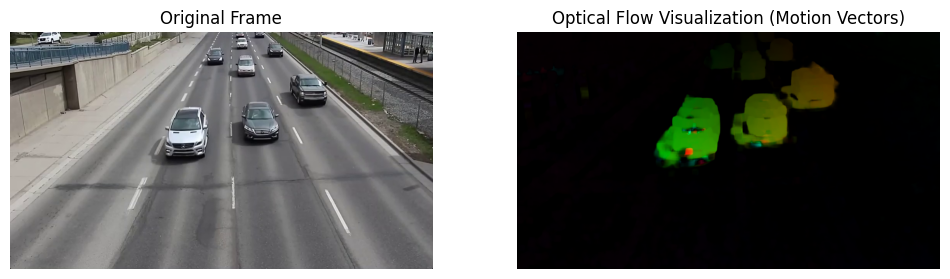

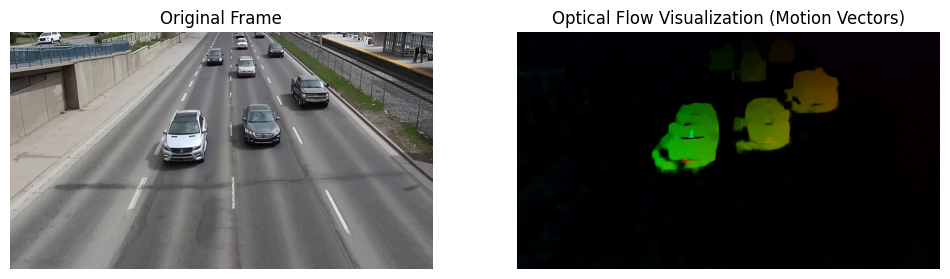

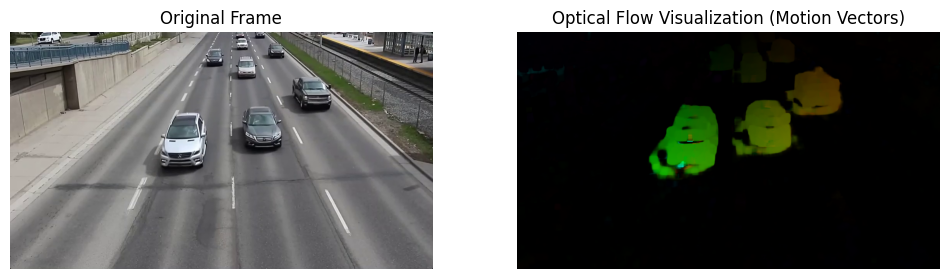

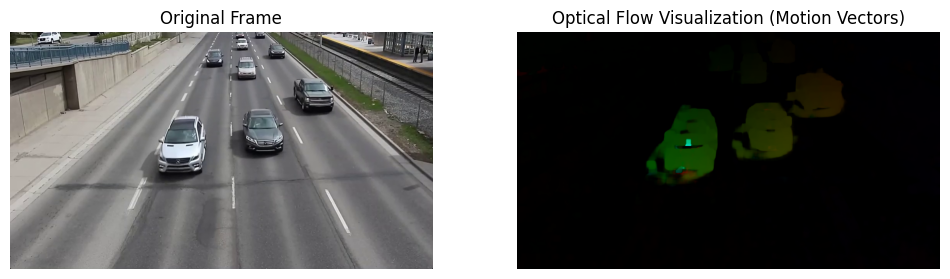

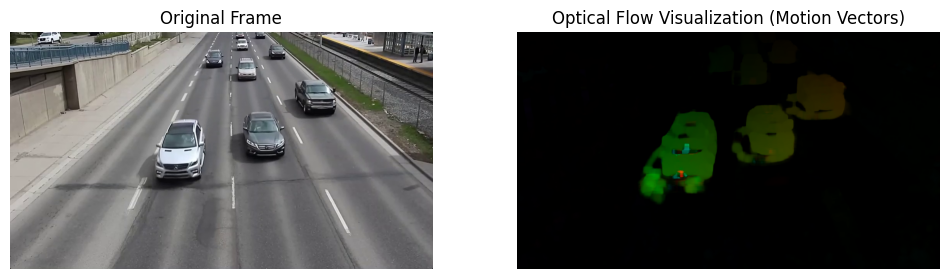

✅ Optical Flow processing complete!


In [16]:
# ===========================
# Step 3: Optical Flow calculation (Farneback method)
# ===========================
frames_to_show = 5  # Capture and visualize 5 frames for the report
count = 0

while cap.isOpened():
    ret, frame2 = cap.read()
    if not ret:
        break

    next_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None,
                                        0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = angle * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    rgb_flow = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # Motion detection (threshold magnitude)
    motion_mask = cv2.threshold(magnitude, 2, 255, cv2.THRESH_BINARY)[1]
    motion_mask = motion_mask.astype(np.uint8)

    # Display a few frames for visualization
    if count < frames_to_show:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
        plt.title("Original Frame")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(rgb_flow)
        plt.title("Optical Flow Visualization (Motion Vectors)")
        plt.axis("off")
        plt.show()

        count += 1

    prev_gray = next_gray

cap.release()
cv2.destroyAllWindows()
print("✅ Optical Flow processing complete!")


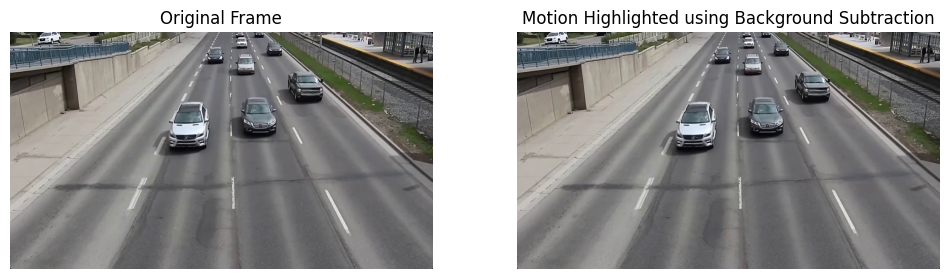

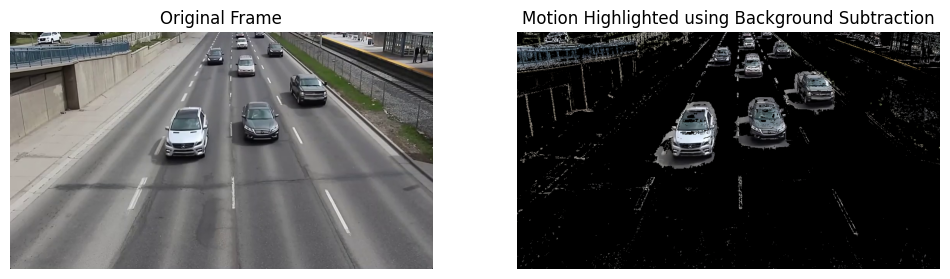

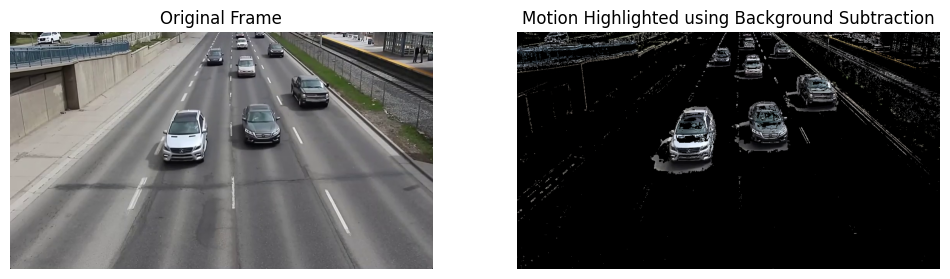

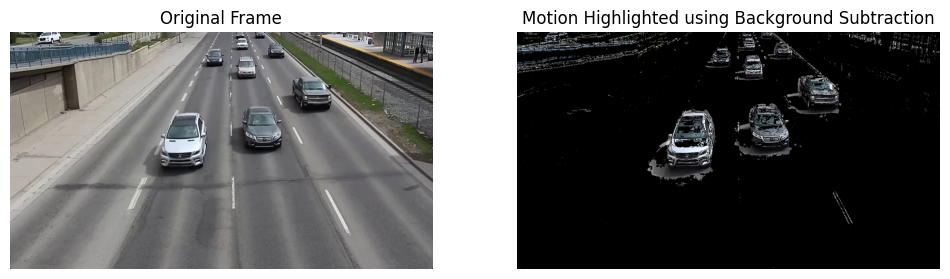

✅ Motion tracking visualization complete!


In [8]:
# ===========================
# Step 4: Optional – Highlight moving objects
# ===========================
cap = cv2.VideoCapture(video_path)
fgbg = cv2.createBackgroundSubtractorMOG2()

frames_shown = 0
while True:
    ret, frame = cap.read()
    if not ret or frames_shown > 3:
        break
    fgmask = fgbg.apply(frame)
    result = cv2.bitwise_and(frame, frame, mask=fgmask)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title("Original Frame")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Motion Highlighted using Background Subtraction")
    plt.axis("off")
    plt.show()

    frames_shown += 1

cap.release()
cv2.destroyAllWindows()
print("✅ Motion tracking visualization complete!")